# Contenido (hipervínculos)

1. <a href="L2D"> Modelo </a>

2. <a href="#caso1">Caso 1: Cilindro sumergido</a>

3. <a href="#caso2"> Caso 2: Isla cónica (NOAA)</a>

4. <a href="#caso3"> Caso 3: Chile 2010 (Moreno)</a>

In [1]:
import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat

In [3]:
def simulation(x,h,eta,p,q,R1,R11,R6,R2,R4,R5,nt,gx,debug=False):
    dp1 = np.zeros_like(x)
    dp2 = np.zeros_like(x)
    dq1 = np.zeros_like(x)
    dq2 = np.zeros_like(x)

    zdepth = np.zeros_like(eta)
    zdepth[0,:,:] = eta[0,:,:]+h

    t0 = time.clock()
    for n in range(nt-1):
        ## Mas Loop
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                if (h[i,j]>gx):
                    zzz = eta[n,i,j] - R1[i,j]*(p[n,i,j]-p[n,i-1,j]) \
                                   - R11[i,j]*(q[n,i,j]*R6[i,j]-q[n,i,j-1]*R6[i,j-1])
                    DD = zzz + h[i,j]
                    zdepth[n+1,i,j] = DD
                    eta[n+1,i,j] = zzz    
                else:
                    eta[n+1,i,j] = 0.0
                    
        # open boundary
        
        j = 0
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j]**2)
                zz = uu/cc
                if q[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]                        

        j = ny-1
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j-1]**2)
                zz = uu/cc
                if q[n,i,j-1]<0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]                

        i = 0
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                if h[i,j-1]>gx:
                    uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                else:
                    uh = q[n,i,j]
                uu = np.sqrt(uh**2+p[n,i,j]**2)
                zz = uu/cc
                if p[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                uu = np.sqrt(uh**2+p[n,i-1,j]**2)
                zz = uu/cc
                if p[n,i-1,j]<0:
                    zz = -zz
                eta[n+1,i,j] = zz     
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]


        i = 0
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]           

        i = nx-1
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                 

        i = 0
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                         

        # momentum loop

        # momentum in x-direction
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                ip1 = min(nx-1,i+1)
                jp1 = max(0,i-1)

                if h[i,j]>gx and h[ip1,j]>gx:
                    hM = 0.5*(h[i,j]+h[ip1,j]) + 0.5 *(eta[n+1,i,j]+eta[n+1,ip1,j])

                    p[n+1,i,j]  = p[n,i,j] - R2[i,j]* (eta[n+1,ip1,j]-eta[n+1,i,j])
                else:
                    p[n+1,i,j] = 0.0

        # momentum in y-direction
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                ip1 = min(nx-1,i+1)
                jp1 = min(ny-1,j+1)

                if h[i,j]>gx and h[i,jp1]>gx:
    #                     hN = 0.5*(h[i,j]+h[i,jp1]) + 0.5 *(eta[n+1,i,j]+eta[n+1,i,jp1])
                    q[n+1,i,j]  = q[n,i,j] - R4[i,j]*(eta[n+1,i,jp1]-eta[n+1,i,j])
                else:
                    q[n+1,i,j] = 0.0  

        t1 = time.clock()    

        print '%.3f'%(n*1.0/nt), 'elapsed: %.3f s, estimated %.3f s:'%(t1-t0,(t1-t0)*nt*1.0/(n+1))
    return eta,p,q

# Load Test Data: Tsunami Chile 2010


    361 ncols
    361 nrows
    -120.0 xll
    -60.0 yll
    0.166666666667 cellsize
    999999 nodata_value

* Download data from Clawpack site

In [4]:
from clawpack.geoclaw import topotools
import clawpack.clawutil.data as clawutildata
import clawpack.visclaw.colormaps as colormaps
topo_fname = 'etopo10min120W60W60S0S.asc'
url = 'http://www.geoclaw.org/topo/etopo/' + topo_fname
clawutildata.get_remote_file(url, output_dir='.', file_name=topo_fname,
        verbose=True)

data = np.loadtxt('etopo10min120W60W60S0S.asc',skiprows=6)
topo = np.reshape(data,(361,361))
lon = np.arange(-120.,-120+361*0.1666666667,0.1666666667)
lat = np.arange(-60.,-60+361*0.1666666667,0.1666666667)

topo2 = topotools.Topography(topo_fname, topo_type=2)

Skipping http://www.geoclaw.org/topo/etopo/etopo10min120W60W60S0S.asc 
  because file already exists: ./etopo10min120W60W60S0S.asc


* Create fancy earth colormap

In [5]:
region_extent = topo2.extent
mean_lat = 0.5 * (region_extent[3] + region_extent[2])

topo_extent = (np.min(topo2.Z), np.max(topo2.Z))

# Create color map - assume shore is at z = 0.0
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                     0.25:[0.0,1.0,0.0],
                                      0.5:[0.8,1.0,0.5],
                                      1.0:[0.8,0.5,0.2]})
sea_cmap = plt.get_cmap('Blues_r')
cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap), 
                                         data_limits=topo_extent,
                                         data_break=0.0)

* Plot current data

/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1215: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1220: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


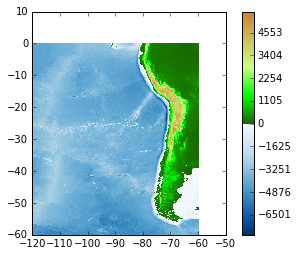

In [6]:
f = plt.figure()
ax = f.add_subplot(111)
ax.set_aspect(1.0 / np.cos(np.pi / 180.0 * mean_lat))
plt.pcolormesh(topo2.X, topo2.Y, topo2.Z, norm=norm,cmap=cmap)
plt.colorbar()
# plt.axis('equal')

In [7]:
np.mean(topo2.Z[np.where(topo2.Z<0)])

-3641.1351875439632

# Set the simulation

Boundaries are the same as in the normal case

Parámetros

In [8]:
R_earth = 6378000.
rad_deg = 0.01745329252
rad_min = 0.000290888208665721
cori_w = 7.2722e-5
g = 9.81
gx  =1e-1

* Set grid properties. Notice that $dx$ and $dy$ are **INPUT** and are in **MINUTES**

In [10]:
x = topo2.x[::2]
y = topo2.y[::2]
xmesh, ymesh = np.meshgrid(x,y,indexing='ij')

nx = x.shape[0]
ny = y.shape[0]
dx = np.diff(x)[0]*60 #in minutes
dy = np.diff(y)[0]*60 #in minutes
lat_max = max(abs(y[0]),abs(y[-1]))*rad_deg
dx_real = R_earth*np.cos(lat_max)*dx*rad_min
dy_real = R_earth*dy*rad_min
dt = 0.45*min(dx_real,dy_real)/np.sqrt(g*np.max(-topo2.Z))
print dt

29.9161526941


(-120.0, -50.0, -60.0, 10.0)

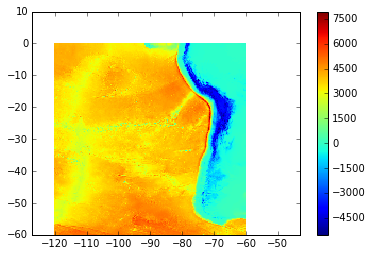

In [14]:
h = -topo2.Z.T[::2,::2]
L = x.max()-x.min()
plt.pcolormesh(xmesh,ymesh,h)
plt.colorbar()
plt.axis('equal')

In [15]:
RR = dt/R_earth
angM = ymesh*rad_deg
cosM = np.cos(angM)
sinM = np.sin(angM)
R1 = RR/(cosM*dx*rad_min)
R11 = RR/(cosM*dy*rad_min)
R6 = np.cos((ymesh+0.5*dy/60.0)*rad_deg)
print 'RR',RR
print 'R1',R1.min(),R1.max()
print 'R11', R11.min(),R11.max()
print 'R6', R6.min(), R6.max()

RR 4.69052252965e-06
R1 0.000806241433977 0.00161248286796
R11 0.000806241433977 0.00161248286796
R6 0.502517046831 0.999995769205


In [16]:
RS = g*RR
hp = h*1.0
hp[0:-1,:] = 0.5*(h[0:-1,:]+h[1:,:])
R2 = np.where(hp>0,RS/(cosM*dx*rad_min)*hp,0.0)
RT = 0.5*dt*cori_w
R3 = RT*sinM
print 'R2',R2.min(),R2.max()
print 'R3',R3.min(),R3.max()

R2 0.0 83.9416886649
R3 -0.000942046177304 2.2783113147e-15


In [17]:
angN = (ymesh + 0.5*dy/60.)*rad_deg
sinN = np.sin(angN)
hq = h*1.0
hq[:,0:-1] = 0.5*(h[:,0:-1]+h[:,1:])
R4 = np.where(hq>0,RS/(dy*rad_min)*hq,0.0)
R5 = RT*sinN

* The variables that **matter**: $\eta,p,q$

In [18]:
nt = 200
eta = np.zeros((nt,nx,ny))
p = np.zeros_like(eta)
q = np.zeros_like(eta)

eta[0,:,:] = np.exp(-((xmesh+100)**2+(y+30)**2)/10)*5.0

xmid = 0.3*x.max()+0.7*x.min()
ymid = 0.3*y.max()+0.7*y.min()
L = 0.15*(y.max()-y.min())
eta[0,:,:] = np.exp(-((xmesh-xmid)**2+(ymesh-ymid)**2)/L**2)
# eta[0,:,:] = np.where(h>0,eta[0,:,:],-h)

(-120.0, -50.0, -60.0, 10.0)

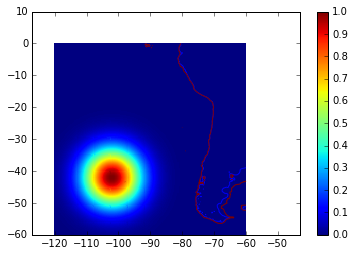

In [19]:
plt.contour(xmesh,ymesh,h, [0.0,10.0,100.0])
plt.pcolormesh(xmesh,ymesh,eta[0,:,:])
plt.colorbar()
plt.axis('equal')

In [24]:
eta,p,q = simulation(x,h,eta,p,q,R1,R11,R6,R2,R4,R5,nt,gx)

0.000 elapsed: 0.381 s, estimated 76.142 s:
0.005 elapsed: 0.635 s, estimated 63.471 s:
0.010 elapsed: 0.884 s, estimated 58.964 s:
0.015 elapsed: 1.240 s, estimated 61.998 s:
0.020 elapsed: 1.494 s, estimated 59.743 s:
0.025 elapsed: 1.745 s, estimated 58.174 s:
0.030 elapsed: 2.000 s, estimated 57.152 s:
0.035 elapsed: 2.260 s, estimated 56.497 s:
0.040 elapsed: 2.513 s, estimated 55.837 s:
0.045 elapsed: 2.767 s, estimated 55.344 s:
0.050 elapsed: 3.030 s, estimated 55.087 s:
0.055 elapsed: 3.284 s, estimated 54.730 s:
0.060 elapsed: 3.543 s, estimated 54.505 s:
0.065 elapsed: 3.805 s, estimated 54.350 s:
0.070 elapsed: 4.062 s, estimated 54.158 s:
0.075 elapsed: 4.316 s, estimated 53.954 s:
0.080 elapsed: 4.574 s, estimated 53.807 s:
0.085 elapsed: 4.879 s, estimated 54.206 s:
0.090 elapsed: 5.214 s, estimated 54.882 s:
0.095 elapsed: 5.528 s, estimated 55.285 s:
0.100 elapsed: 5.843 s, estimated 55.646 s:
0.105 elapsed: 6.149 s, estimated 55.904 s:
0.110 elapsed: 6.450 s, estimate


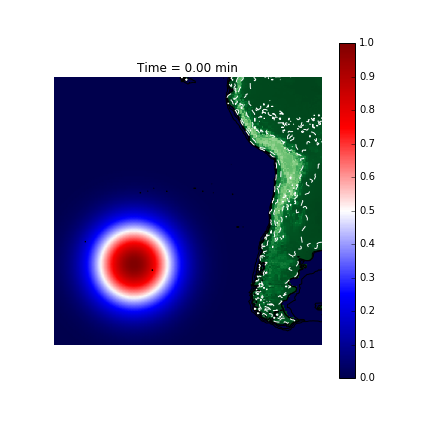
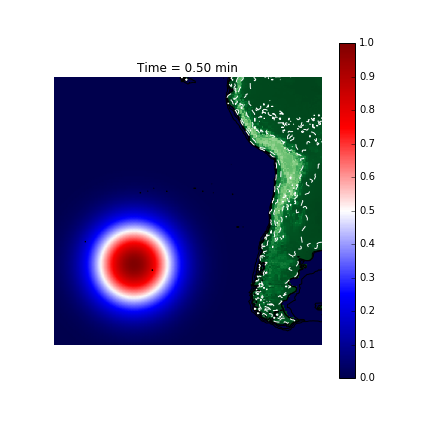
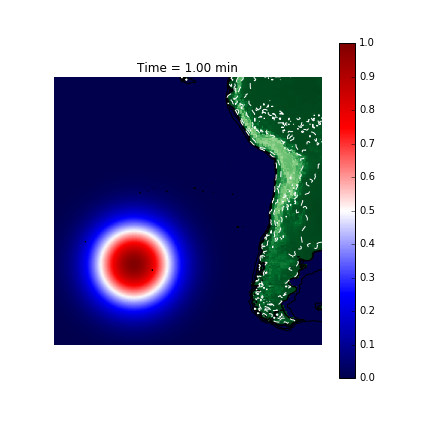
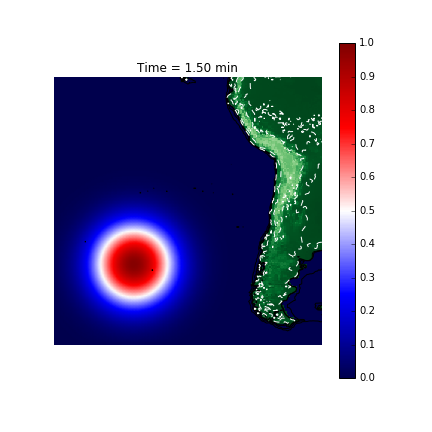
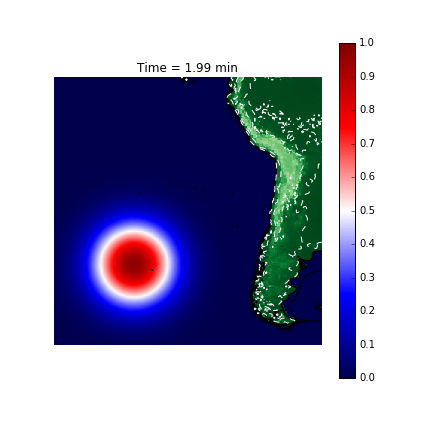
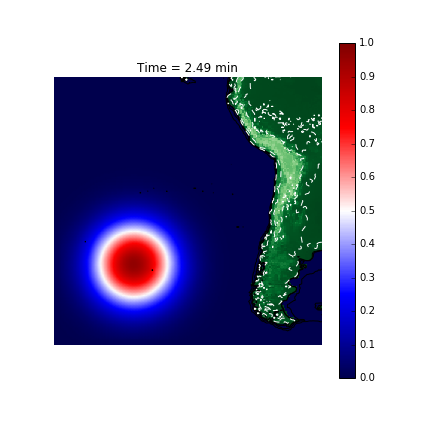
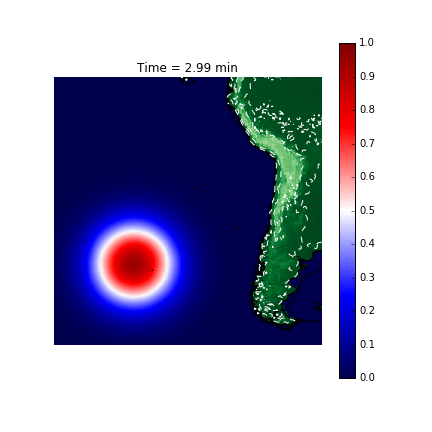
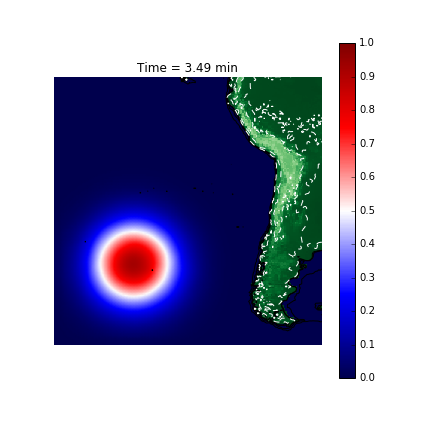
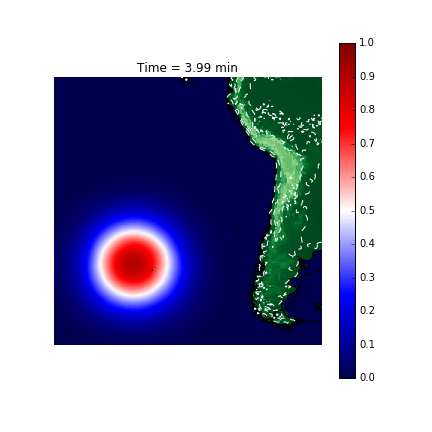
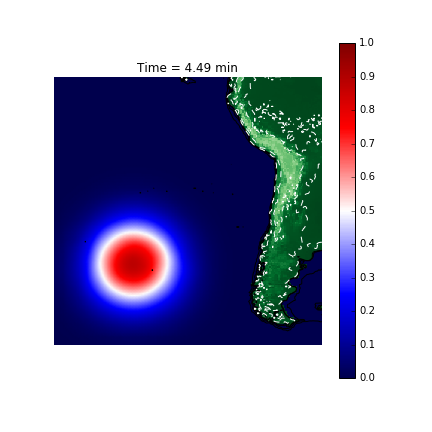
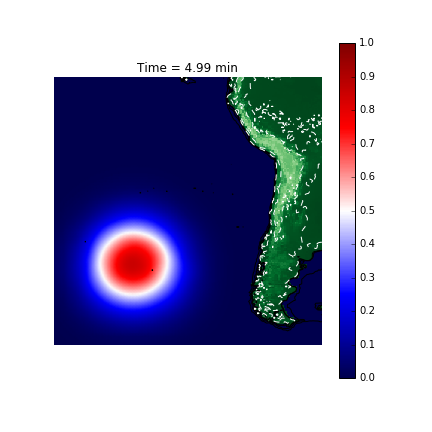
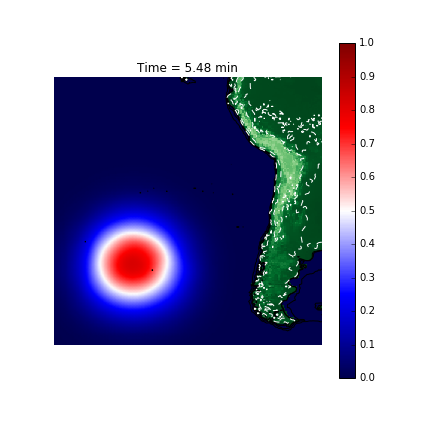
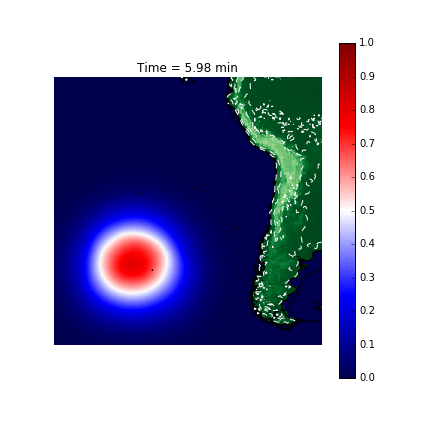
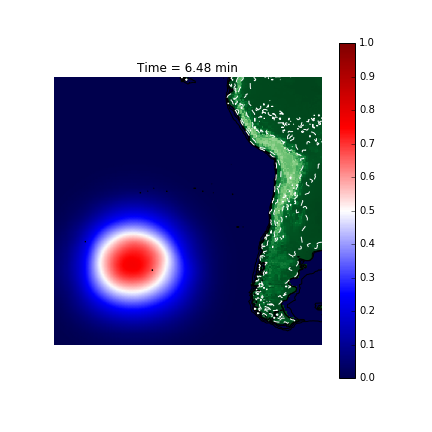
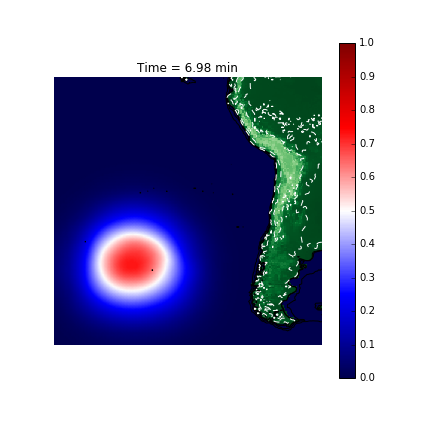
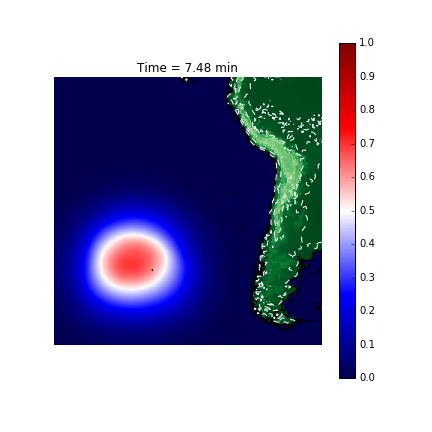
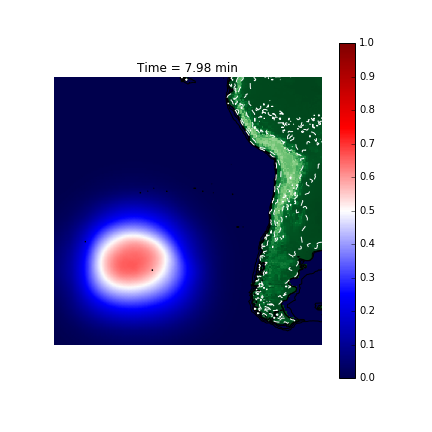
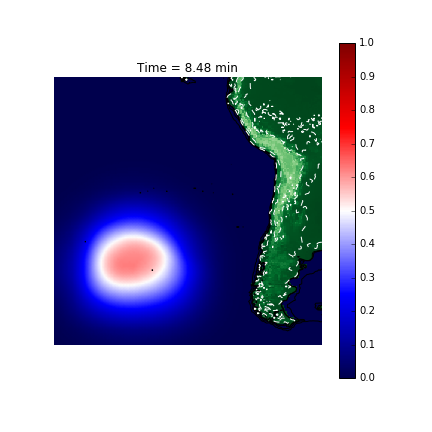
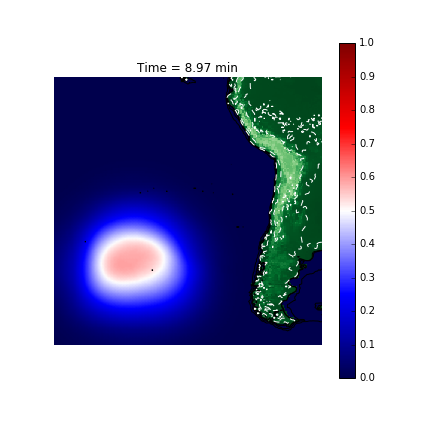
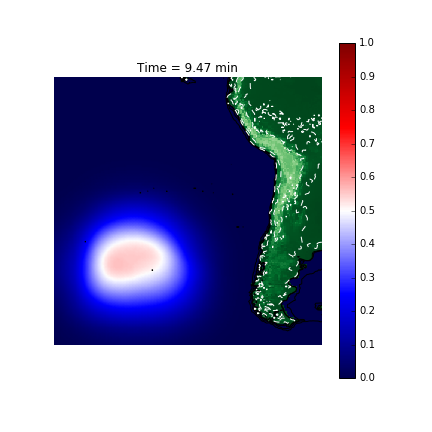
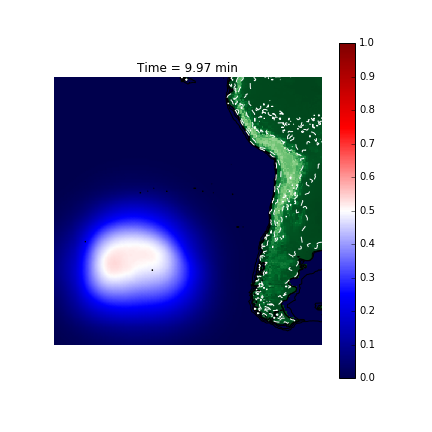
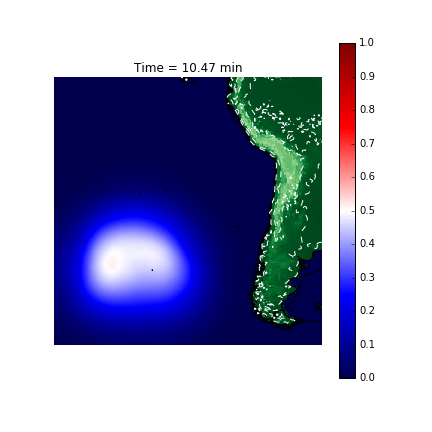
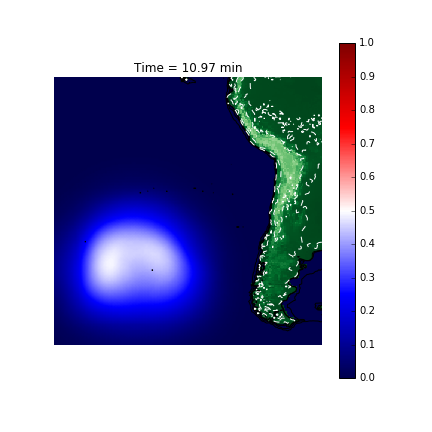
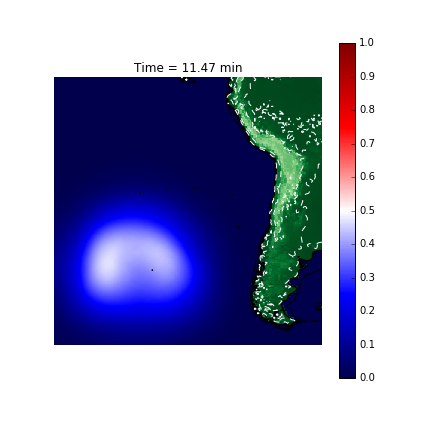
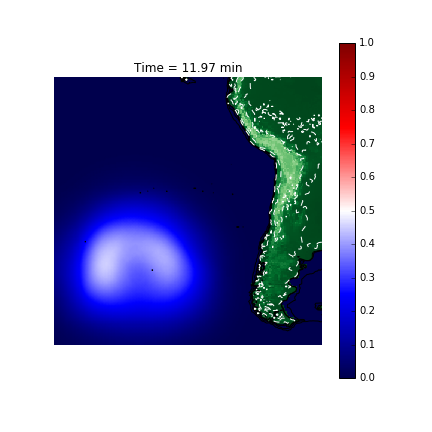
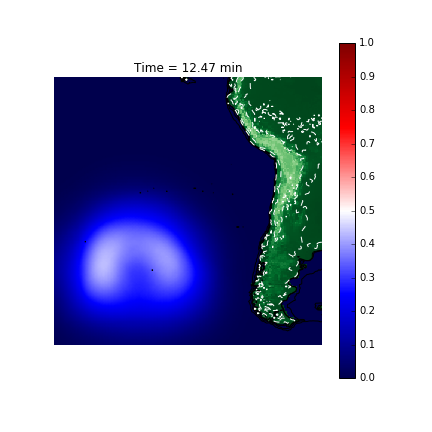
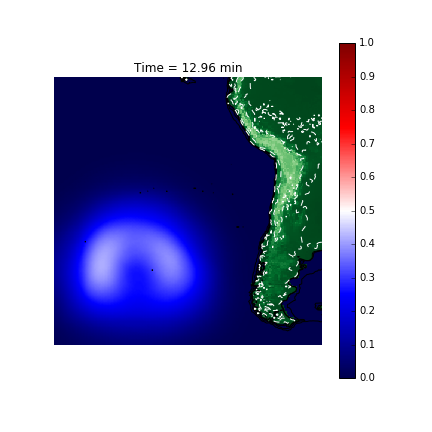
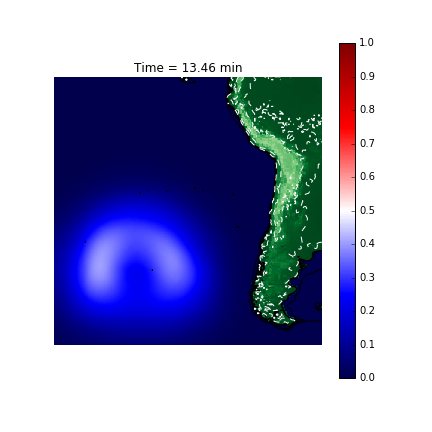
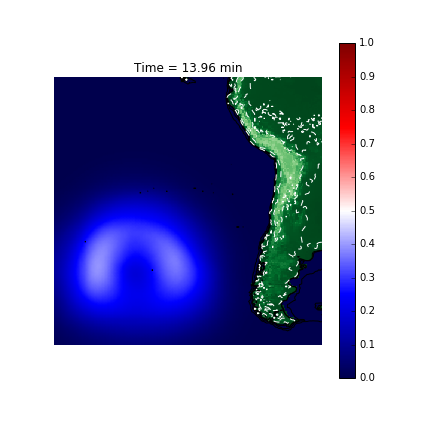
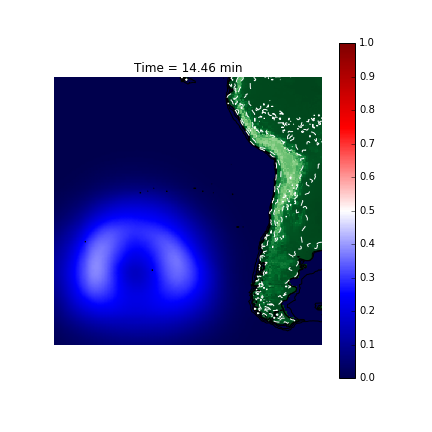
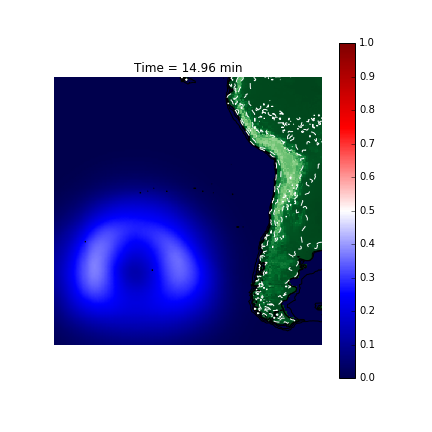
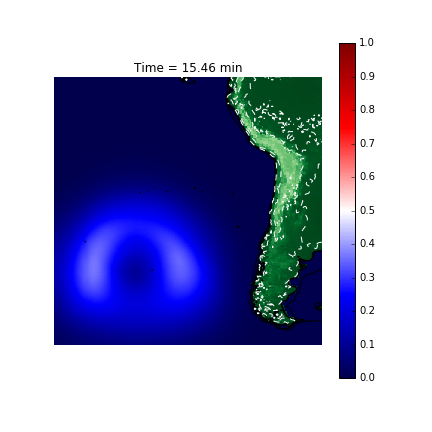
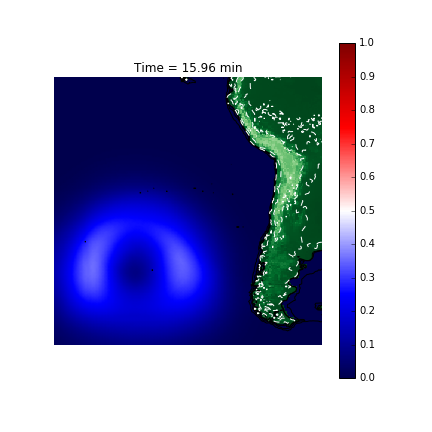
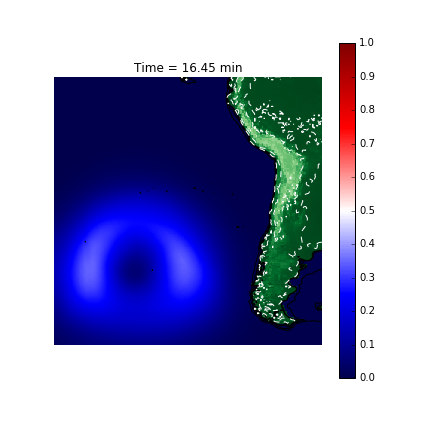
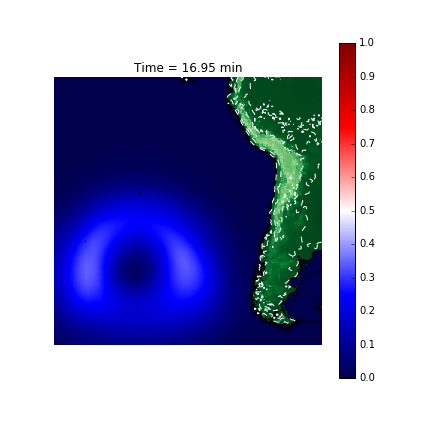
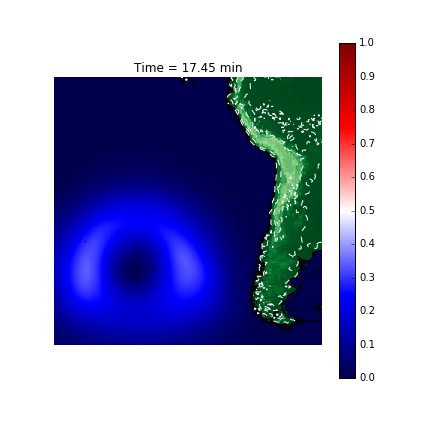
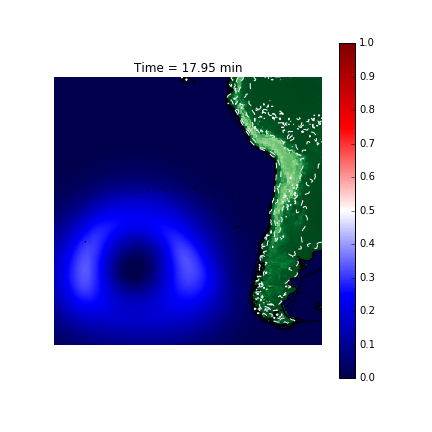
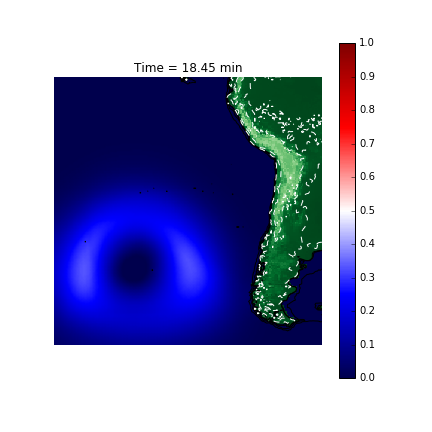
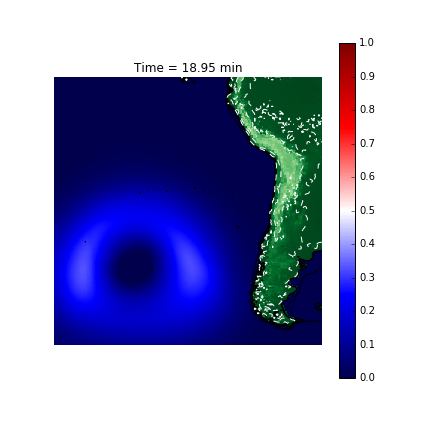
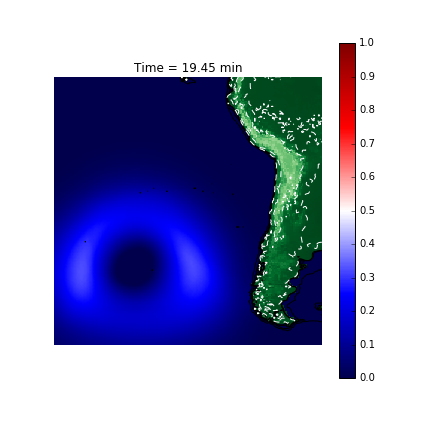
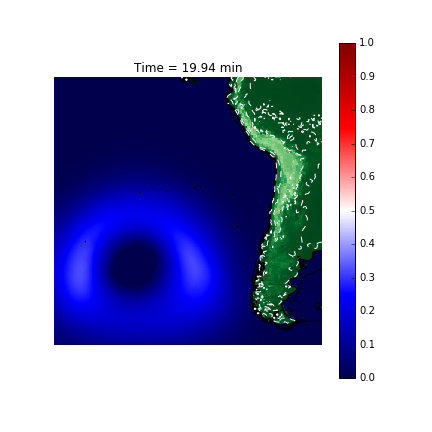
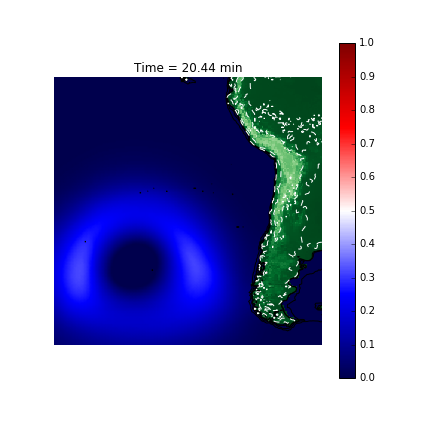
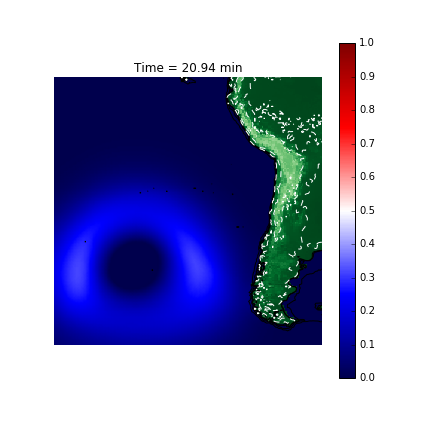
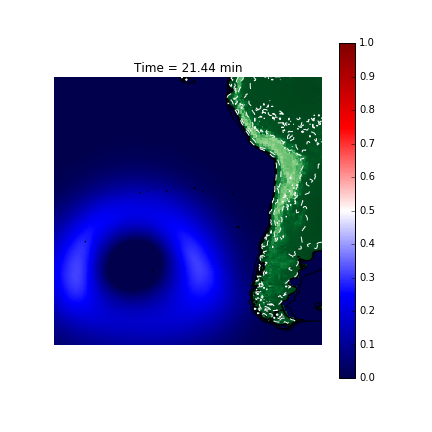
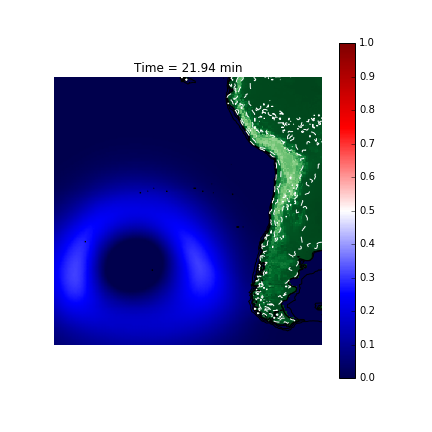
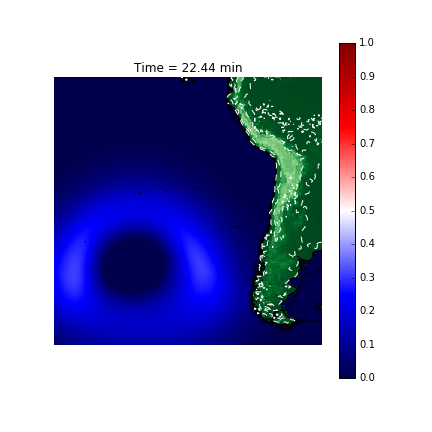
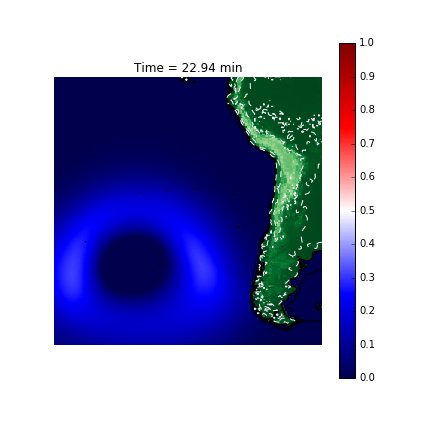
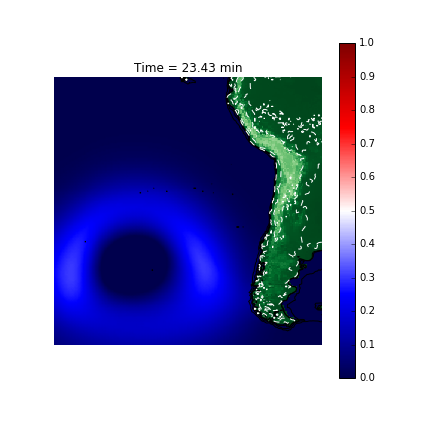
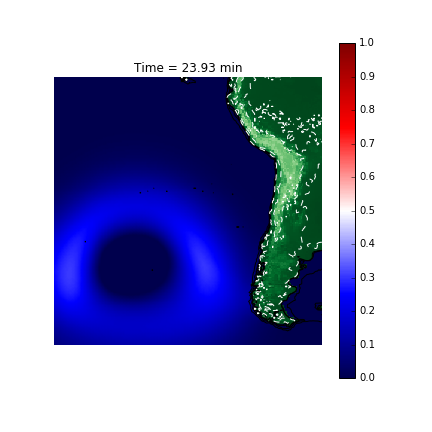
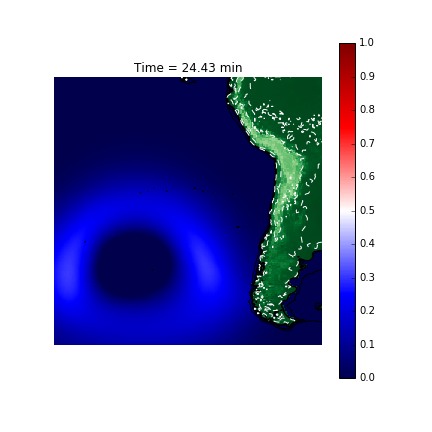

In [29]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(111)
quad1 = ax2.pcolormesh(xmesh,ymesh,eta[0,:,:],vmax=eta[0,:,:].max(),vmin=0.0,
                       shading='gouraud',cmap=plt.cm.seismic)
plt.pcolormesh(xmesh,ymesh,np.ma.masked_where(h>0,-h),vmin=0.0,vmax=8000, cmap=plt.cm.Greens_r)
ax2.contour(xmesh,ymesh,h,[0.,10.,100.,1000.],colors='k')
ax2.contour(xmesh,ymesh,h,[-5000.,-2000.,-200.],colors='w')
ax2.set_axis_off()
t = ax2.set_title('Time = %.2f min'%(0.0))
# ax2.set_xlim(-10,5)
# ax2.set_ylim(-5,5)
cb2 = fig.colorbar(quad1,ax=ax2)
ax2.set_aspect('equal')
def init():
    quad1.set_array([])
    return quad1,


def animate(i):
    t.set_text('Time = %.2f min'%(i*dt/60.))
    quad1.set_array(np.ma.masked_where(h<0,eta[i*4,:,:]).ravel())
    return quad1,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=50, interval=100)

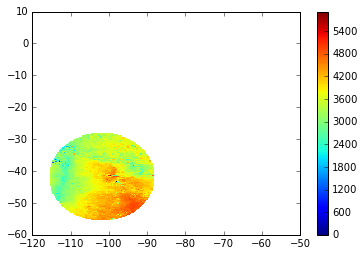

In [35]:
plt.pcolormesh(xmesh,ymesh,np.ma.masked_where(eta[0,:,:]<1e-1,h),vmin=0.0)
plt.colorbar()